Exploratory data analysis 3rd assignment
# Name : Amey Narayan Tendolkar

In [50]:
string="SampleSuperstore.csv"

In [51]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [52]:
data=pd.read_csv(string)

In [53]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [54]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [55]:
data.isnull().sum()
#no null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [56]:
data.duplicated().sum()

17

In [57]:
data.drop_duplicates(subset=None,keep="first",inplace=True)

In [58]:
data.duplicated().sum()

0

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


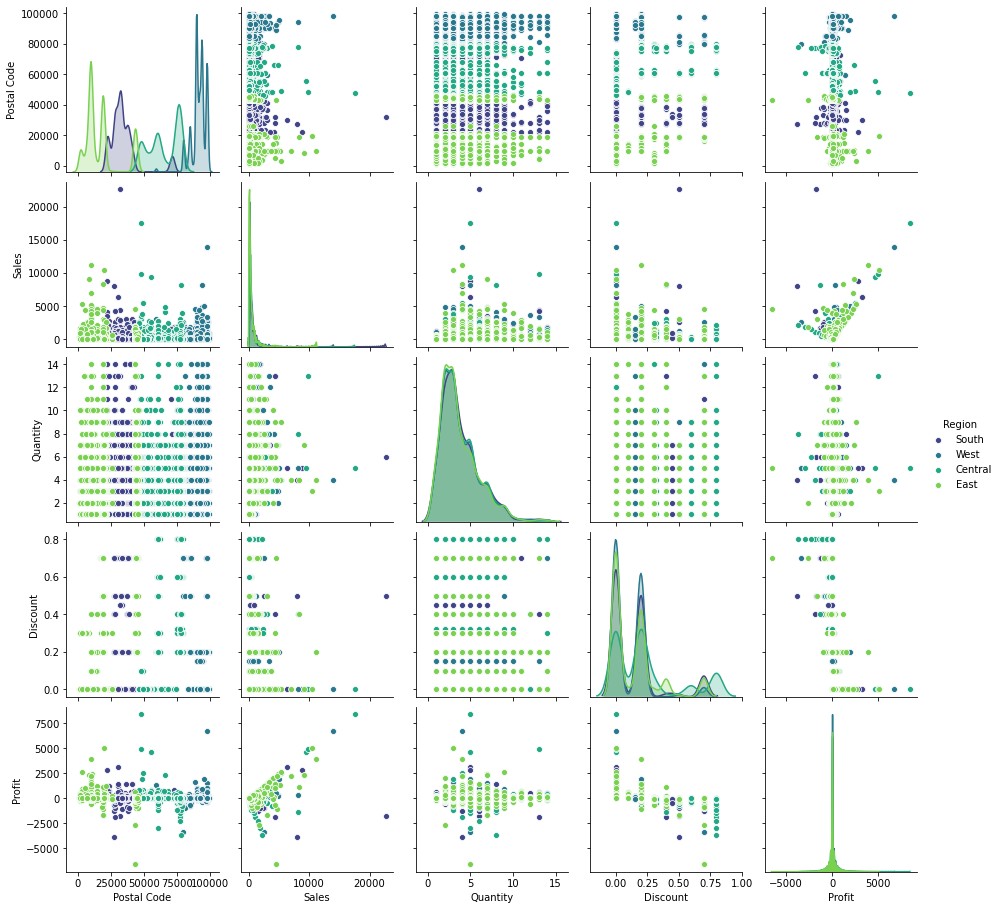

In [65]:
sns.pairplot(data, hue="Region",palette="viridis")

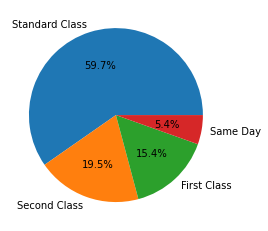

In [84]:

from matplotlib import pyplot as plt 

plt.pie(data["Ship Mode"].value_counts() , labels=data["Ship Mode"].value_counts().index,autopct="%1.1f%%")
plt.show()

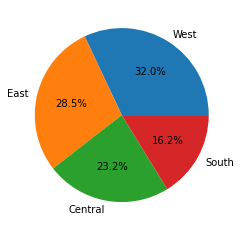

In [85]:
plt.pie(data["Region"].value_counts() , labels=data["Region"].value_counts().index,autopct="%1.1f%%")
plt.show()

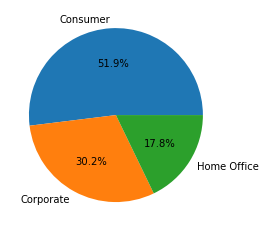

In [87]:
plt.pie(data["Segment"].value_counts() , labels=data["Segment"].value_counts().index,autopct="%1.1f%%")
plt.show()

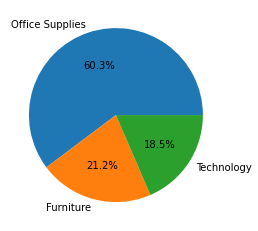

In [88]:
plt.pie(data["Category"].value_counts() , labels=data["Category"].value_counts().index,autopct="%1.1f%%")
plt.show()

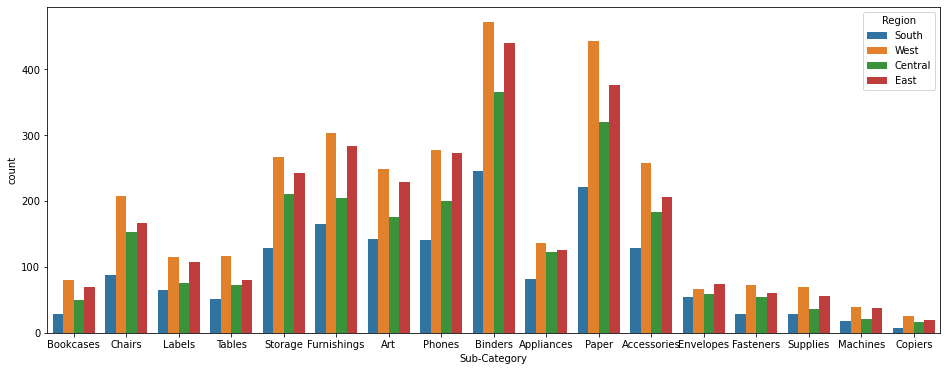

In [99]:
plt.figure(figsize=(16,6))
sns.countplot(x=data["Sub-Category"], hue=data["Region"])

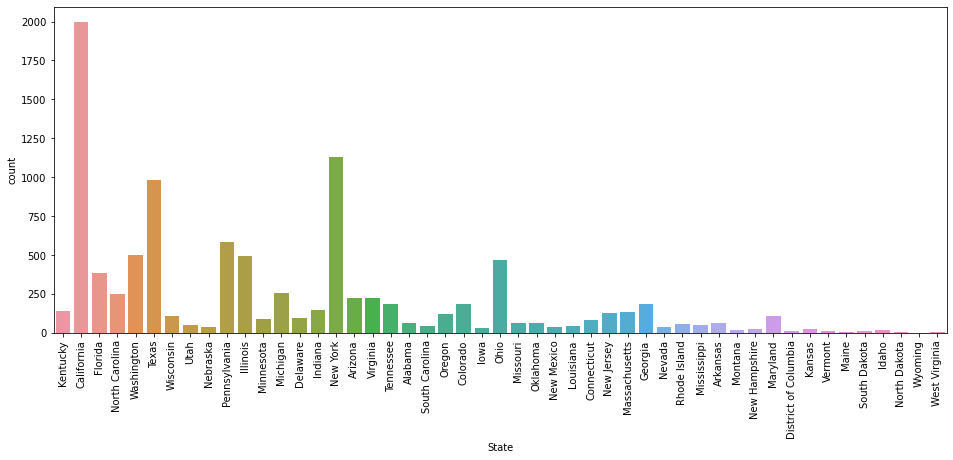

In [104]:
plt.figure(figsize=(16,6))
sns.countplot(x=data["State"])

plt.xticks(rotation=90);

In [108]:
data["freq"]=data.groupby("City")['City'].transform('count')
df=data.sort_values(["freq"],ascending=False).groupby("City").head(10)

In [111]:
df=df[["City","freq"]]

In [113]:
df.duplicated().sum()

2565

In [114]:
df.drop_duplicates(subset=None,keep="first",inplace=True)

<ipython-input-114-d9439f0dfa6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=None,keep="first",inplace=True)


In [115]:
df.duplicated().sum()

0

In [119]:
df.reset_index(drop=True)

,City,freq
0,New York City,914
1,Los Angeles,746
2,Philadelphia,536
3,San Francisco,506
4,Seattle,424
...,...,...
526,Tinley Park,1
527,Aberdeen,1
528,Pensacola,1
529,Whittier,1


In [122]:
corr_col=["Sales","Quantity","Discount","Profit"]
m=data[corr_col].corr()

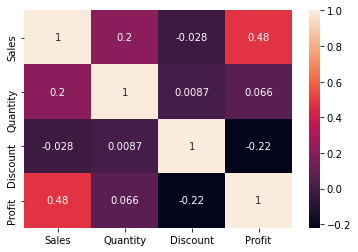

In [126]:
sns.heatmap(m,annot=True)

# conclusion
1) In south region the profit is less so we should focus on sales in south.
2) sale of office supply is more
3) california , new york city has more sells